<a href="https://colab.research.google.com/github/mkhi238/Pokemon_Classifier_Project/blob/main/DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


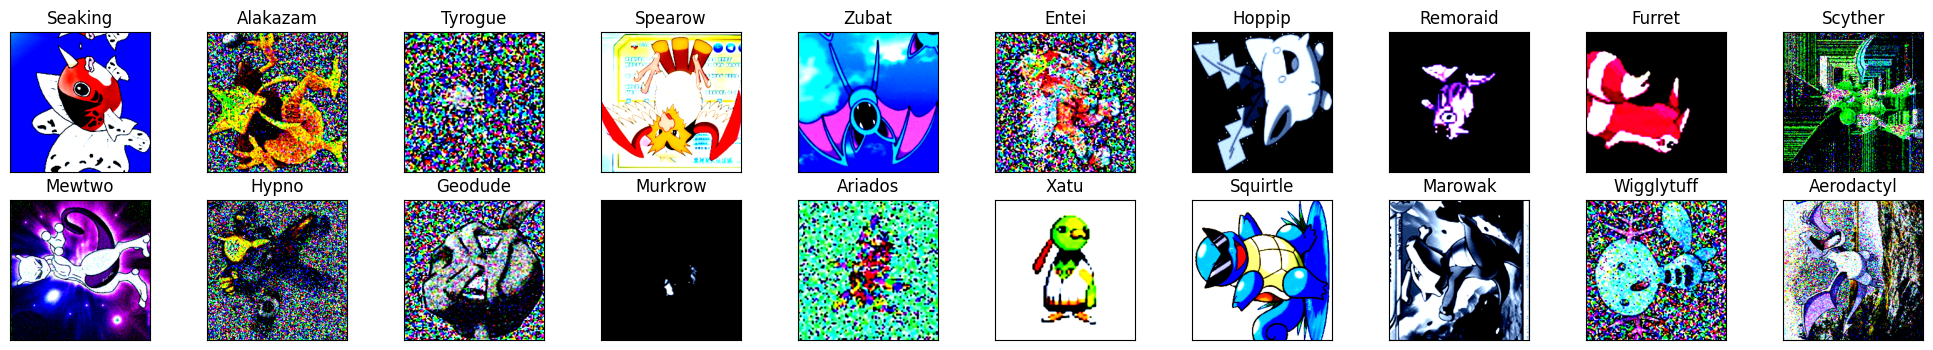

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from math import floor
import os
import torchvision.models
import time

densenet = torchvision.models.densenet121(pretrained = True)
torch.manual_seed(103)
#102 is main

from google.colab import drive
drive.mount('/content/gdrive')
train_path = "/content/gdrive/My Drive/APS360 Team Project/NewAug_DenseNet/V3/Training"
valid_path = "/content/gdrive/My Drive/APS360 Team Project/NewAug_DenseNet/V3/Validation"
test_path = "/content/gdrive/My Drive/APS360 Team Project/NewAug_DenseNet/V3/Test"


data_transforms = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])
                    ])


train_datasets = torchvision.datasets.ImageFolder(root= train_path, transform = data_transforms) 
valid_datasets = torchvision.datasets.ImageFolder(root= valid_path, transform = data_transforms) 

hyperparameters = [20,1]

train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)

valid_loader = torch.utils.data.DataLoader(valid_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)


dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx]))
    ax.set_title(pokemon_names[labels[idx]])

In [ ]:
hyperparameters = [1,2]

train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)
valid_loader = torch.utils.data.DataLoader(valid_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)
def features_to_folder(loader, path):
    n = 0
    for img, label in loader:

      features = densenet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      x = torch.tensor(label)
      q = x.item()

      folder_name = path + '/' + str(pokemon_names[q])
      if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n += 1

features_to_folder(train_loader, train_path)
features_to_folder(valid_loader, valid_path)

<ipython-input-13-84eb7fb5bc6e>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(label)


In [ ]:
def graph_features(fig, classes):
  fig = plt.figure(figsize=(25, 4))
  for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [ ]:

pokemon_names = ['Abra', 'Aerodactyl', 'Aipom', 'Alakazam', 'Ampharos', 'Arbok', 'Arcanine', 'Ariados', 'Articuno', 'Azumarill', 'Bayleef', 'Beedrill', 'Bellossom', 'Bellsprout', 'Blastoise', 'Blissey', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Celebi', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Chikorita', 'Chinchou', 'Clefable', 'Clefairy', 'Cleffa', 'Cloyster', 'Corsola', 'Crobat', 'Croconaw', 'Cubone', 'Cyndaquil', 'Delibird', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Donphan', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Dunsparce', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Elekid', 'Entei', 'Espeon', 'Exeggcute', 'Exeggutor', 'Farfetch\'d', 'Fearow', 'Feraligatr', 'Flaaffy', 'Flareon', 'Forretress', 'Furret', 'Gastly', 'Gengar', 'Geodude', 'Girafarig', 'Gligar', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Granbull', 'Graveler', 'Grimer', 'Growlith', 'Gyarados', 'Haunter', 'Heracross', 'Hitmonchan', 'Hitmonlee', 'Hitmontop', 'Ho-oh', 'Hoothoot', 'Hoppip', 'Horsea', 'Houndoom', 'Houndour', 'Hypno', 'Igglybuff', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jumpluff', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingdra', 'Kingler', 'Koffing', 'Krabby', 'Lanturn', 'Lapras', 'Larvitar', 'Ledian', 'Ledyba', 'Lickitung', 'Lugia', 'Machamp', 'Machoke', 'Machop', 'Magby', 'Magcargo', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Mantine', 'Mareep', 'Marill', 'Marowak', 'Meganium', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Miltank', 'Misdreavus', 'Moltres', 'Mr. Mime', 'Muk', 'Murkrow', 'Natu', 'Nidoking', 'Nidoqueen', 'Nidorina', 'Nidorino', 'Ninetales', 'Noctowl', 'Octillery', 'Oddish', 'Omanyte', 'Omastar', 'Onix', 'Paras', 'Parasect', 'Persian', 'Phanpy', 'Pichu', 'Pidgeot', 'Pidgeotto', 'Pidgey', 'Pikachu', 'Piloswine', 'Pineco', 'Pinsir', 'Politoed', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Ponyta', 'Porygon', 'Porygon2', 'Primeape', 'Psyduck', 'Pupitar', 'Quagsire', 'Quilava', 'Qwilfish', 'Raichu', 'Raikou', 'Rapidash', 'Raticate', 'Rattata', 'Remoraid', 'Rhydon', 'Rhyhorn', 'Sandshrew', 'Sandslash', 'Scizor', 'Scyther', 'Seadra', 'Seaking', 'Seel', 'Sentret', 'Shellder', 'Shuckle', 'Skarmory', 'Skiploom', 'Slowbro', 'Slowking', 'Slowpoke', 'Slugma', 'Smeargle', 'Smoochum', 'Sneasel', 'Snorlax', 'Snubbull', 'Spearow', 'Spinarak', 'Squirtle', 'Stantler', 'Starmie', 'Staryu', 'Steelix', 'Sudowoodo', 'Suicune', 'Sunflora', 'Sunkern', 'Swinub', 'Tangela', 'Tauros', 'Teddiursa', 'Tentacool', 'Tentacruel', 'Togepi', 'Togetic', 'Totodile', 'Typhlosion', 'Tyranitar', 'Tyrogue', 'Umbreon', 'Unown', 'Ursaring', 'Vaporeon', 'Venomoth', 'Venonat', 'Venusaur', 'Victreebel', 'Vileplume', 'Voltorb', 'Vulpix', 'Wartortle', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Whooper', 'Wobbuffet', 'Xatu', 'Yanma', 'Zapdos', 'Zubat']
print(len(pokemon_names))

249


In [ ]:
train_path = "/content/gdrive/My Drive/APS360 Team Project/NewAug_DenseNet/V3/Training"
train_dataset_new = torchvision.datasets.DatasetFolder(train_path, loader=torch.load, extensions=('.tensor'))
valid_path = "/content/gdrive/My Drive/APS360 Team Project/NewAug_DenseNet/V3/Validation"
valid_dataset_new = torchvision.datasets.DatasetFolder(valid_path, loader=torch.load, extensions=('.tensor'))

hyperparameters = [1,1]

train_loader = torch.utils.data.DataLoader(train_dataset_new, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)
valid_loader = torch.utils.data.DataLoader(valid_dataset_new, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)

In [ ]:
use_cuda = False

In [ ]:
#Base AlexNet
class Pokemon_Classifier_AlexNet(nn.Module):
    def __init__(self, name = "Pokemon_Classifier_AlexNet"):
          self.name = "Pokemon_Classifier_AlexNet"
          super(Pokemon_Classifier_AlexNet, self).__init__()
          self.fc1 = nn.Linear(50176, 1000)
          self.fc2 = nn.Linear(1000, 249)

    def forward(self, x):
          x = x.view(-1, 50176)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x

In [ ]:
def train(model, train_dataset, valid_dataset, batch_size=128, learning_rate=0.001, num_epochs=20):

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                              num_workers=1, shuffle=True, drop_last = True)
    val_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, 
                                              num_workers=1, shuffle=True, drop_last = True)
    train_acc = []
    valid_acc = []
    loss_chart = []
    epochs = []
    timelist = []

    # training

    n = 0

    for epoch in range(num_epochs):
        start_time = time.time()
        total_train_loss = 0.0
        total_train_err = 0.0
        total_images = 0
        percent = 0
        l = 0
        for imgs, labels in iter(train_loader):
            if l % 100 == 0:
              print("Percentage of Epoch Loaded " + str(round(percent / len(train_loader) * 100, 2)))
            if use_cuda == True:
              imgs = imgs.cuda()
              labels = labels.cuda()



            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            percent += 1
            l += 1
        n += 1

        epochs.append(n)
        timelist.append((time.time() - start_time))

        
        # track accuracy
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        loss_chart.append(float(loss)/batch_size)
        model_path = f"model_{model.name}_bs{batch_size}_lr{learning_rate}_epoch{epoch}"
        torch.save(model.state_dict(), model_path)


        print((f"Epoch {epoch+1}: Train accuracy = {train_acc[-1]}; Validation accuracy = {valid_acc[-1]}"))

    epochs = np.arange(1, num_epochs + 1)

    plotting(epochs,loss_chart,train_acc, valid_acc)

    return train_acc[-1], valid_acc[-1], epochs, timelist

In [ ]:
def plotting(epochs, loss_chart, train_acc, valid_acc):
    plt.title("Training Loss Curve")
    plt.plot(epochs, loss_chart, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Accuracy Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

In [ ]:
def get_accuracy(model, test_loader):
    data = test_loader

    correct = 0
    total = 0
    for imgs, labels in data:
        if use_cuda == True:
          imgs = imgs.cuda()
          labels = labels.cuda()
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
!nvidia-smi
torch.cuda.is_available()

Wed Apr  5 01:23:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [ ]:
model = Pokemon_Classifier_AlexNet()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print("Training on Cuda!")

train(model, train_dataset_new, valid_dataset_new, batch_size = 2, learning_rate = 0.001, num_epochs=5)

Percentage of Epoch Loaded 0.0


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in valid_loader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ["Aipom",
                "Ampharos",    
                "Ariados",    
                "Azumarill",    
                "Bayleef",    
                "Bellossom",    
                "Blissey",    
                "Celebi",    
                "Chikorita",    
                "Chinchou",    
                "Cleffa",    
                "Corsola",    
                "Crobat",    
                "Croconaw",    
                "Cyndaquil",    
                "Delibird",    
                "Donphan",    
                "Dunsparce",    
                "Elekid",    
                "Entei",    
                "Espeon",    
                "Feraligatr",    
                "Flaaffy",    
                "Forretress",    
                "Furret",    
                "Girafarig",    
                "Gligar",    
                "Granbull",    
                "Heracross",    
                "Hitmontop",
                "Ho-oh",    
                "Hoothoot",    
                "Hoppip",    
                "Houndoom",    
                "Houndour",    
                "Igglybuff",    
                "Jumpluff",    
                "Kingdra",    
                "Lanturn",    
                "Larvitar",    
                "Ledian",    
                "Ledyba",    
                "Lugia",    
                "Magby",    
                "Magcargo",    
                "Mantine",    
                "Mareep",    
                "Marill",   
                "Meganium",    
                "Miltank",    
                "Misdreavus",    
                "Murkrow",    
                "Natu",    
                "Noctowl",    
                "Octillery",    
                "Phanpy",    
                "Pichu",    
                "Piloswine",    
                "Pineco",    
                "Politoed",    
                "Porygon2",    
                "Pupitar",    
                "Quagsire",    
                "Quilava",    
                "Qwilfish",    
                "Raikou",    
                "Remoraid",    
                "Scizor",    
                "Sentret",    
                "Shuckle",    
                "Skarmory",    
                "Skiploom",    
                "Slowking",    
                "Slugma",    
                "Smeargle",    
                "Smoochum",    
                "Sneasel",    
                "Snubbull",    
                "Spinarak",    
                "Stantler",    
                "Steelix",    
                "Sudowoodo",    
                "Suicune",    
                "Sunflora",    
                "Sunkern",    
                "Swinub",    
                "Teddiursa",    
                "Togepi",    
                "Togetic",    
                "Totodile",    
                "Typhlosion",    
                "Tyranitar",    
                "Tyrogue",    
                "Umbreon",    
                "Unown",    
                "Ursaring",    
                "Wobbuffet",    
                "Wooper",    
                "Xatu",    
                "Yanma"]

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')